In [1]:
# Load Libs
import geopandas
from pathlib import Path
import pandas as pd
import datetime
from matplotlib import pyplot as plt

from geopandas.tools import sjoin

In [ ]:
# Load data

# Setup paths
INPUT_PATH = Path.cwd() / '..' / 'input'

# Paths to field boundaries
ce_boundary_path = INPUT_PATH / '20170206_CafRoughBoundaries' / 'CafCookEastArea.shp'
cw_boundary_path = INPUT_PATH / 'FromIanLeslie_CafGeospatial' / 'CE_CW_WGS1984' / 'CookWestBoundariesWGS1984' / 'CookWestBoundariesWGS1984.shp'

# Paths to georeference points
ce_gp_path = INPUT_PATH / 'CookEast_GeoReferencePoints_2016_IL' / 'All_CookEast.shp'
cw_gp_path = INPUT_PATH / 'FromIanLeslie_CafGeospatial' / 'CE_CW_WGS1984' / 'CookWestGeoRefPointsWGS1984' / 'CookWestGeoRefPoints_WGS1984.shp'

# Paths to treatment boundaries
treatment_paths = {
    'ce_treatment_path_1999To2015': INPUT_PATH / 'CookEastStrips' / 'Field_Plan_Final.shp',
    'ce_treatment_path_2016_C01': INPUT_PATH / 'CE_WGS1984_2016_OperationalFieldBoundaries' / 'C01' / 'C0117001.shp',
    'ce_treatment_path_2016_C02': INPUT_PATH / 'CE_WGS1984_2016_OperationalFieldBoundaries' / 'C02' / 'C0217001.shp',
    'ce_treatment_path_2017': INPUT_PATH / '20250307_CookEastFertZonesFromDataStream' / 'CE_SW_2zones2017rates' / 'CE_SW_2zones2017rates.shp',
    'ce_treatment_path_2018': '',  # No fert zones for 2018, crop was garbs
    'ce_treatment_path_2019': INPUT_PATH / '20250307_CookEastFertZonesFromDataStream' / 'CE_WW_2zones2019' / 'CE_WW_2zones2019.shp',
    'ce_treatment_path_2020': INPUT_PATH / '20250307_CookEastFertZonesFromDataStream' / 'CE_C01_Fert_2zones2020_WGS84' / 'CE_C01_Fert_2zones2020_WGS84.shp',
    'ce_treatment_path_2021': INPUT_PATH / '20250307_CookEastFertZonesFromDataStream' / 'WSU_C01_Fert_2zones2021_WGS84' / 'WSU_C01_Fert_2zones2021_WGS84.shp',
    'ce_treatment_path_2022': INPUT_PATH / '20250307_CookEastFertZonesFromDataStream' / 'WSU_C01_Fert_2zones2022_WGS84' / 'WSU_C01_Fert_2zones2022_WGS84' / 'WSU_C01_Fert_2zones2022_WGS84.shp'
}

# CE Gridpoints
#ce_gp_utm_11n = geopandas.read_file(ce_gp_path)
#ce_gp_utm_11n.crs = 'EPSG:26911'
#
#ce_gp = (ce_gp_utm_11n
#    .to_crs('EPSG:4326')
#    .drop(
#        ['FID_1', 'COLUMN', 'ROW', 'ROW2', 'COL_ROW', 'COL_ROW2', 
#        'EASTING', 'NORTHING', 'CROP', 'AREA', 
#        'PERIMETER', 'AREA_AC', 'TARGET'],
#        axis = 1))

<Axes: >

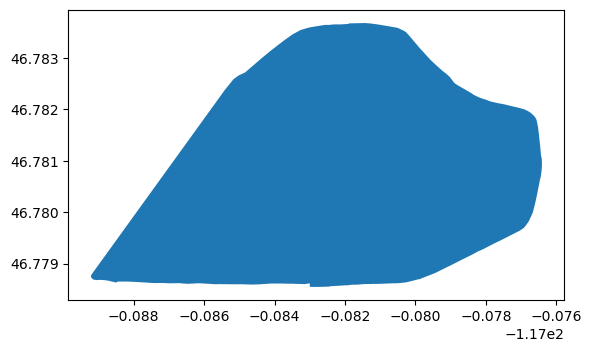

In [ ]:
# Load CE boundary and convert to WGS84
ce_boundary_utm = geopandas.read_file(ce_boundary_path)
ce_boundary_utm.crs = '26911'
ce_boundary = ce_boundary_utm.to_crs('4326')
ce_boundary.plot()

In [48]:
# Clean 1999-2015 polygons
# CE strips
cook_1999To2015_utm_11n = geopandas.read_file(treatment_paths['ce_treatment_path_1999To2015'])
cook_1999To2015_utm_11n.crs = '26911'

cook_1999To2015_utm_11n = (cook_1999To2015_utm_11n
    .to_crs('4326')
    .drop(
        ['Crop', 'Area', 'Perimeter', 'Area_ac', 'Ind_Field'],
        axis = 1))

ce_1999To2015 = cook_1999To2015_utm_11n[cook_1999To2015_utm_11n.intersects(ce_boundary.geometry.iloc[0])]


In [50]:
ce_1999To2015.head()

,Strip,Field,geometry
5,6,A,"POLYGON ((-117.08667 46.77862, -117.08141 46.7..."
6,5,A,"POLYGON ((-117.08718 46.77863, -117.08189 46.7..."
7,4,A,"POLYGON ((-117.08769 46.77864, -117.08247 46.7..."
8,3,A,"POLYGON ((-117.08817 46.77865, -117.08302 46.7..."
9,2,A,"POLYGON ((-117.08868 46.77866, -117.08386 46.7..."
